In [1]:
import numpy as np
import healpy as hp
import camb
import matplotlib.pyplot as plt

In [2]:
kSZ = np.load("kSZ_NS_2048_R_2968_P_2048_DV_60_Sd_128107.npy")
lensedkSZ = np.load("lensedkSZ_NS_2048_R_2968_P_2048_DV_60_Sd_128107.npy")

In [3]:
pskSZ = hp.anafast(kSZ)

In [4]:
pslensedkSZ = hp.anafast(lensedkSZ)

In [5]:
h=0.69
pars = camb.CAMBparams()
pars.set_cosmology(H0=100.0*h, ombh2=0.048*h**2, omch2=0.262*h**2, mnu=0.06, omk=0)
pars.InitPower.set_params(As=2e-9, ns=0.96, r=0)
pars.set_for_lmax(6144, lens_potential_accuracy=0)
results = camb.get_results(pars)
powers =results.get_cmb_power_spectra(pars, CMB_unit='K')
l=np.arange(0,len(powers['total'][:,0]))
cambFactor = l*(l+1)/(2*np.pi)
CMB_camb = powers['total'][:,0]/cambFactor
CMB_camb[0]=0.0

/tmp/ipykernel_185543/526117941.py:10: RuntimeWarning: invalid value encountered in true_divide
  CMB_camb = powers['total'][:,0]/cambFactor


In [6]:
CMB_map = hp.sphtfunc.synfast(CMB_camb,nside=2048);

In [7]:
psCMB = hp.anafast(CMB_map)

In [8]:
ls1 = np.arange(0,6144)

In [9]:
ls2 = np.arange(0,6195)

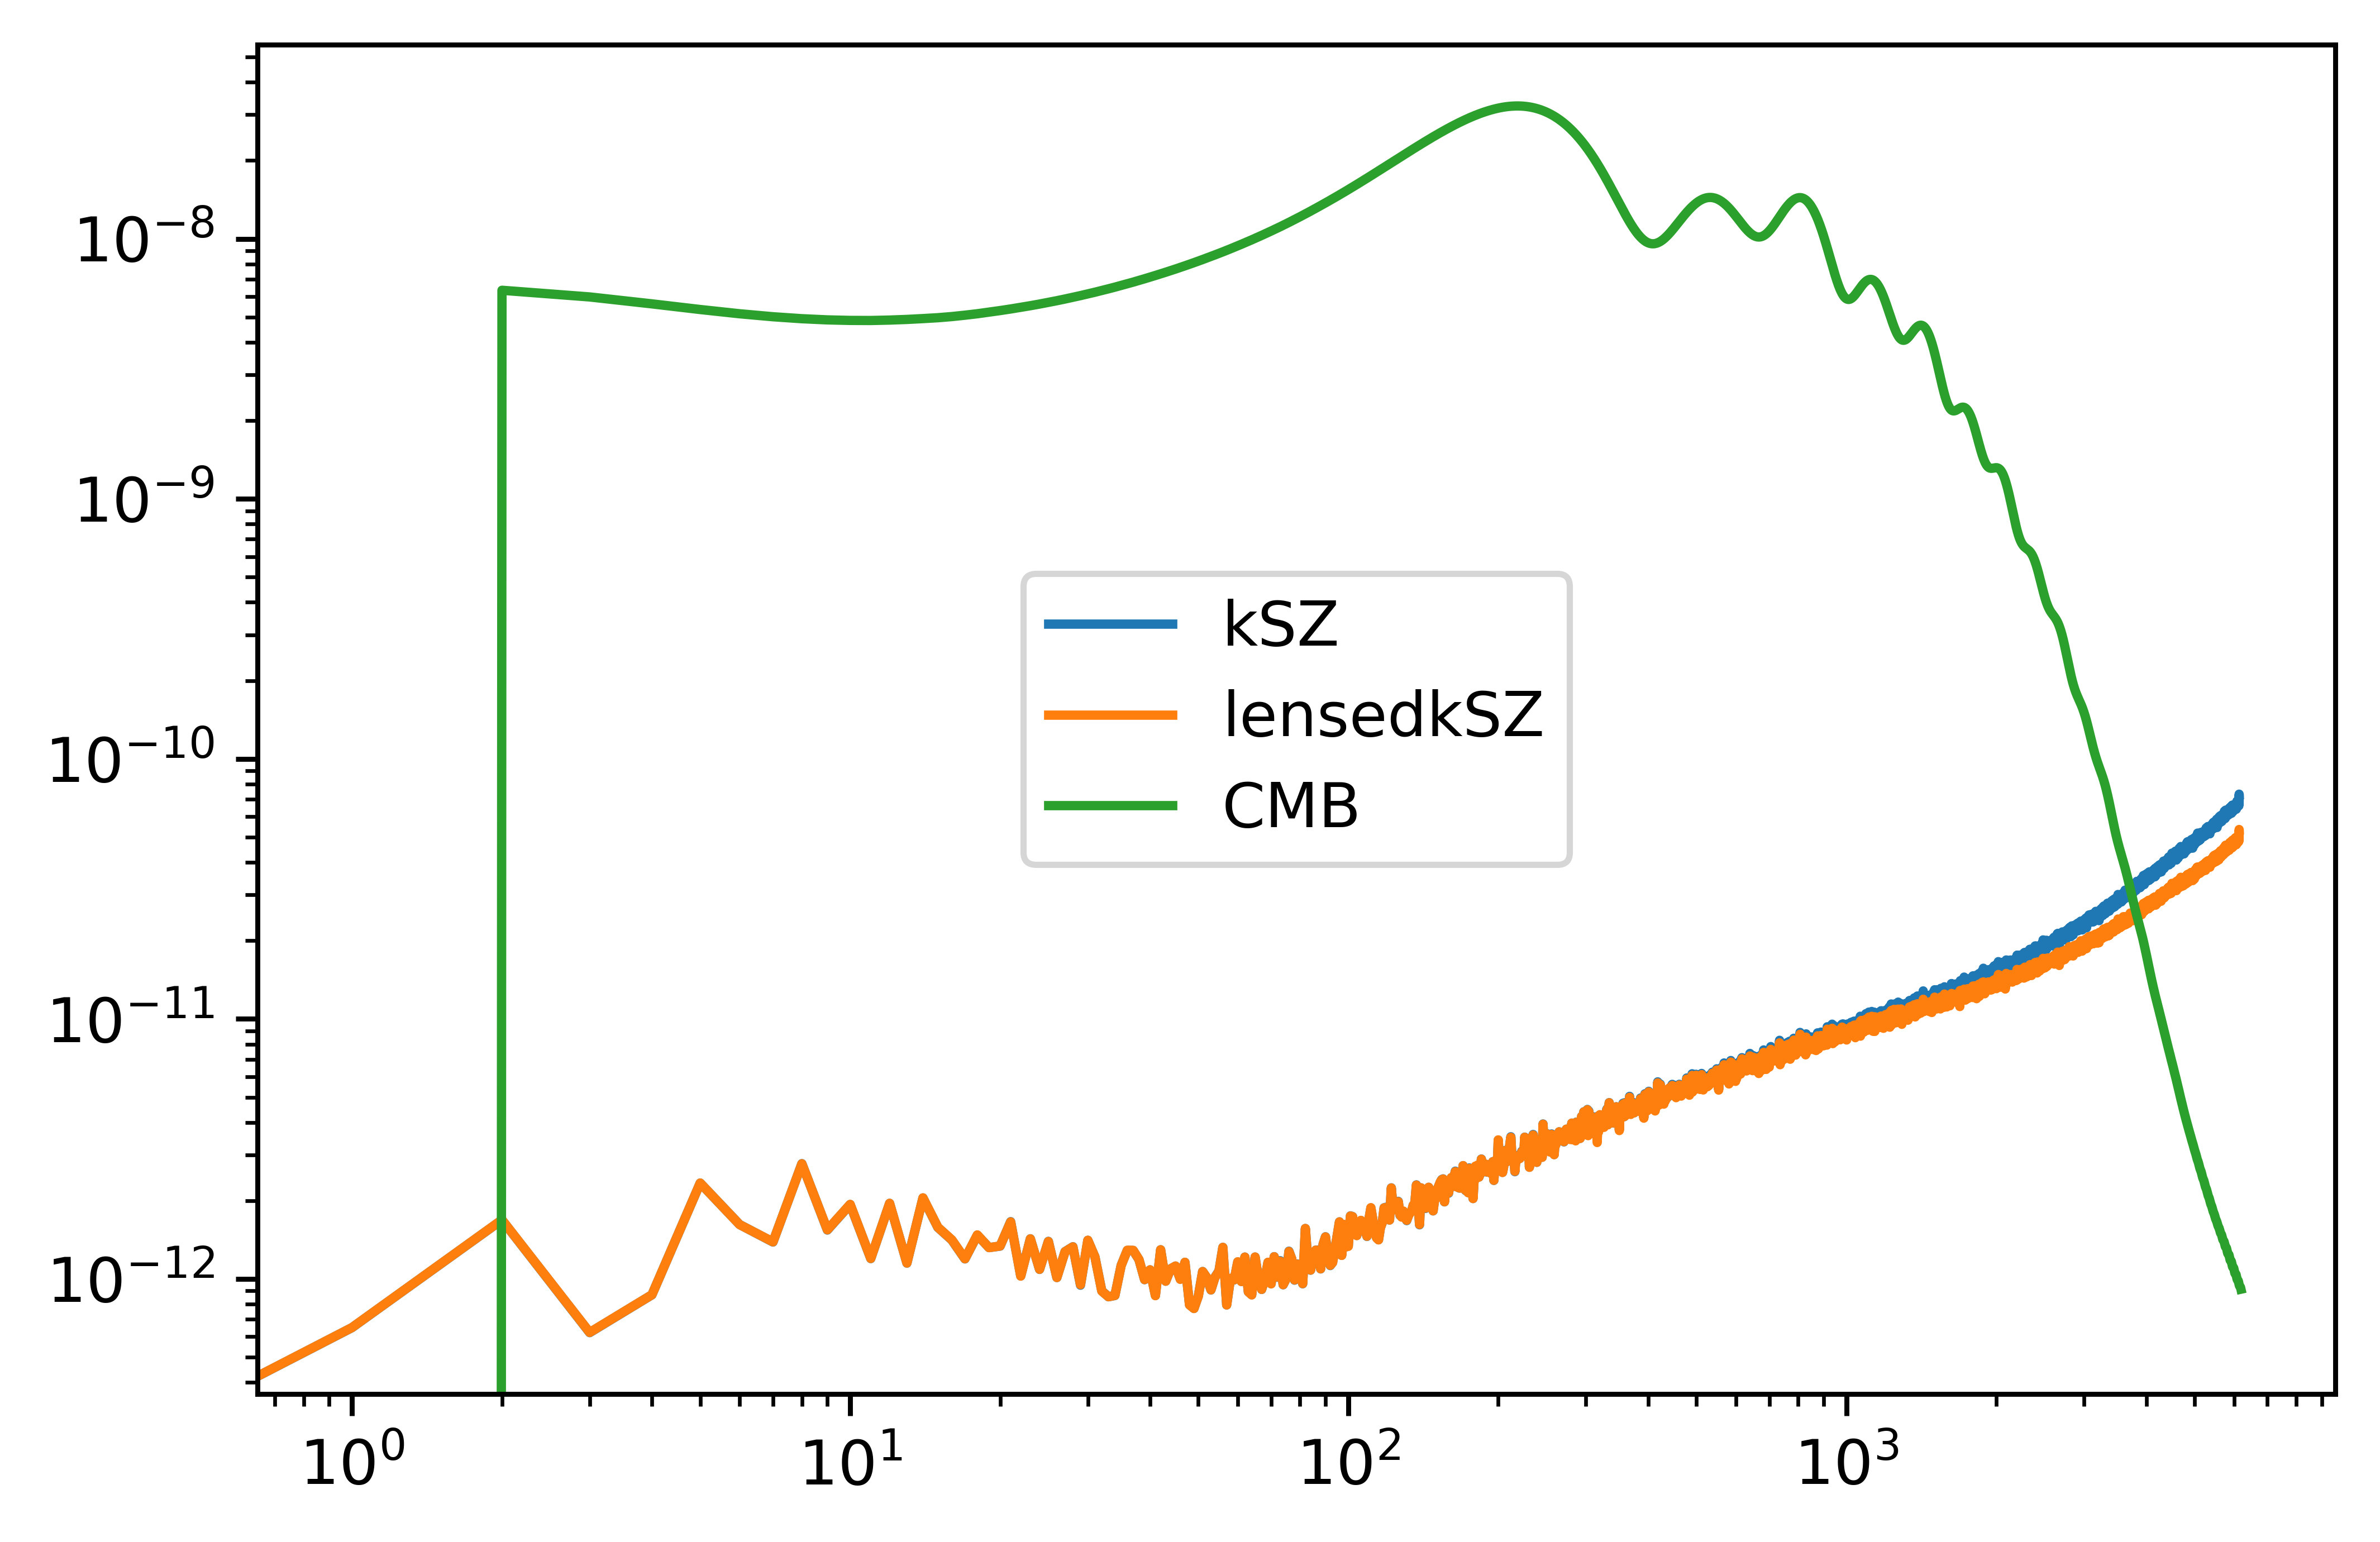

In [10]:
plt.figure(dpi=800)
plt.loglog(pskSZ*ls1*(ls1+1))
plt.loglog(pslensedkSZ*ls1*(ls1+1))
plt.loglog(CMB_camb*ls2*(ls2+1))
plt.legend(['kSZ','lensedkSZ','CMB'])

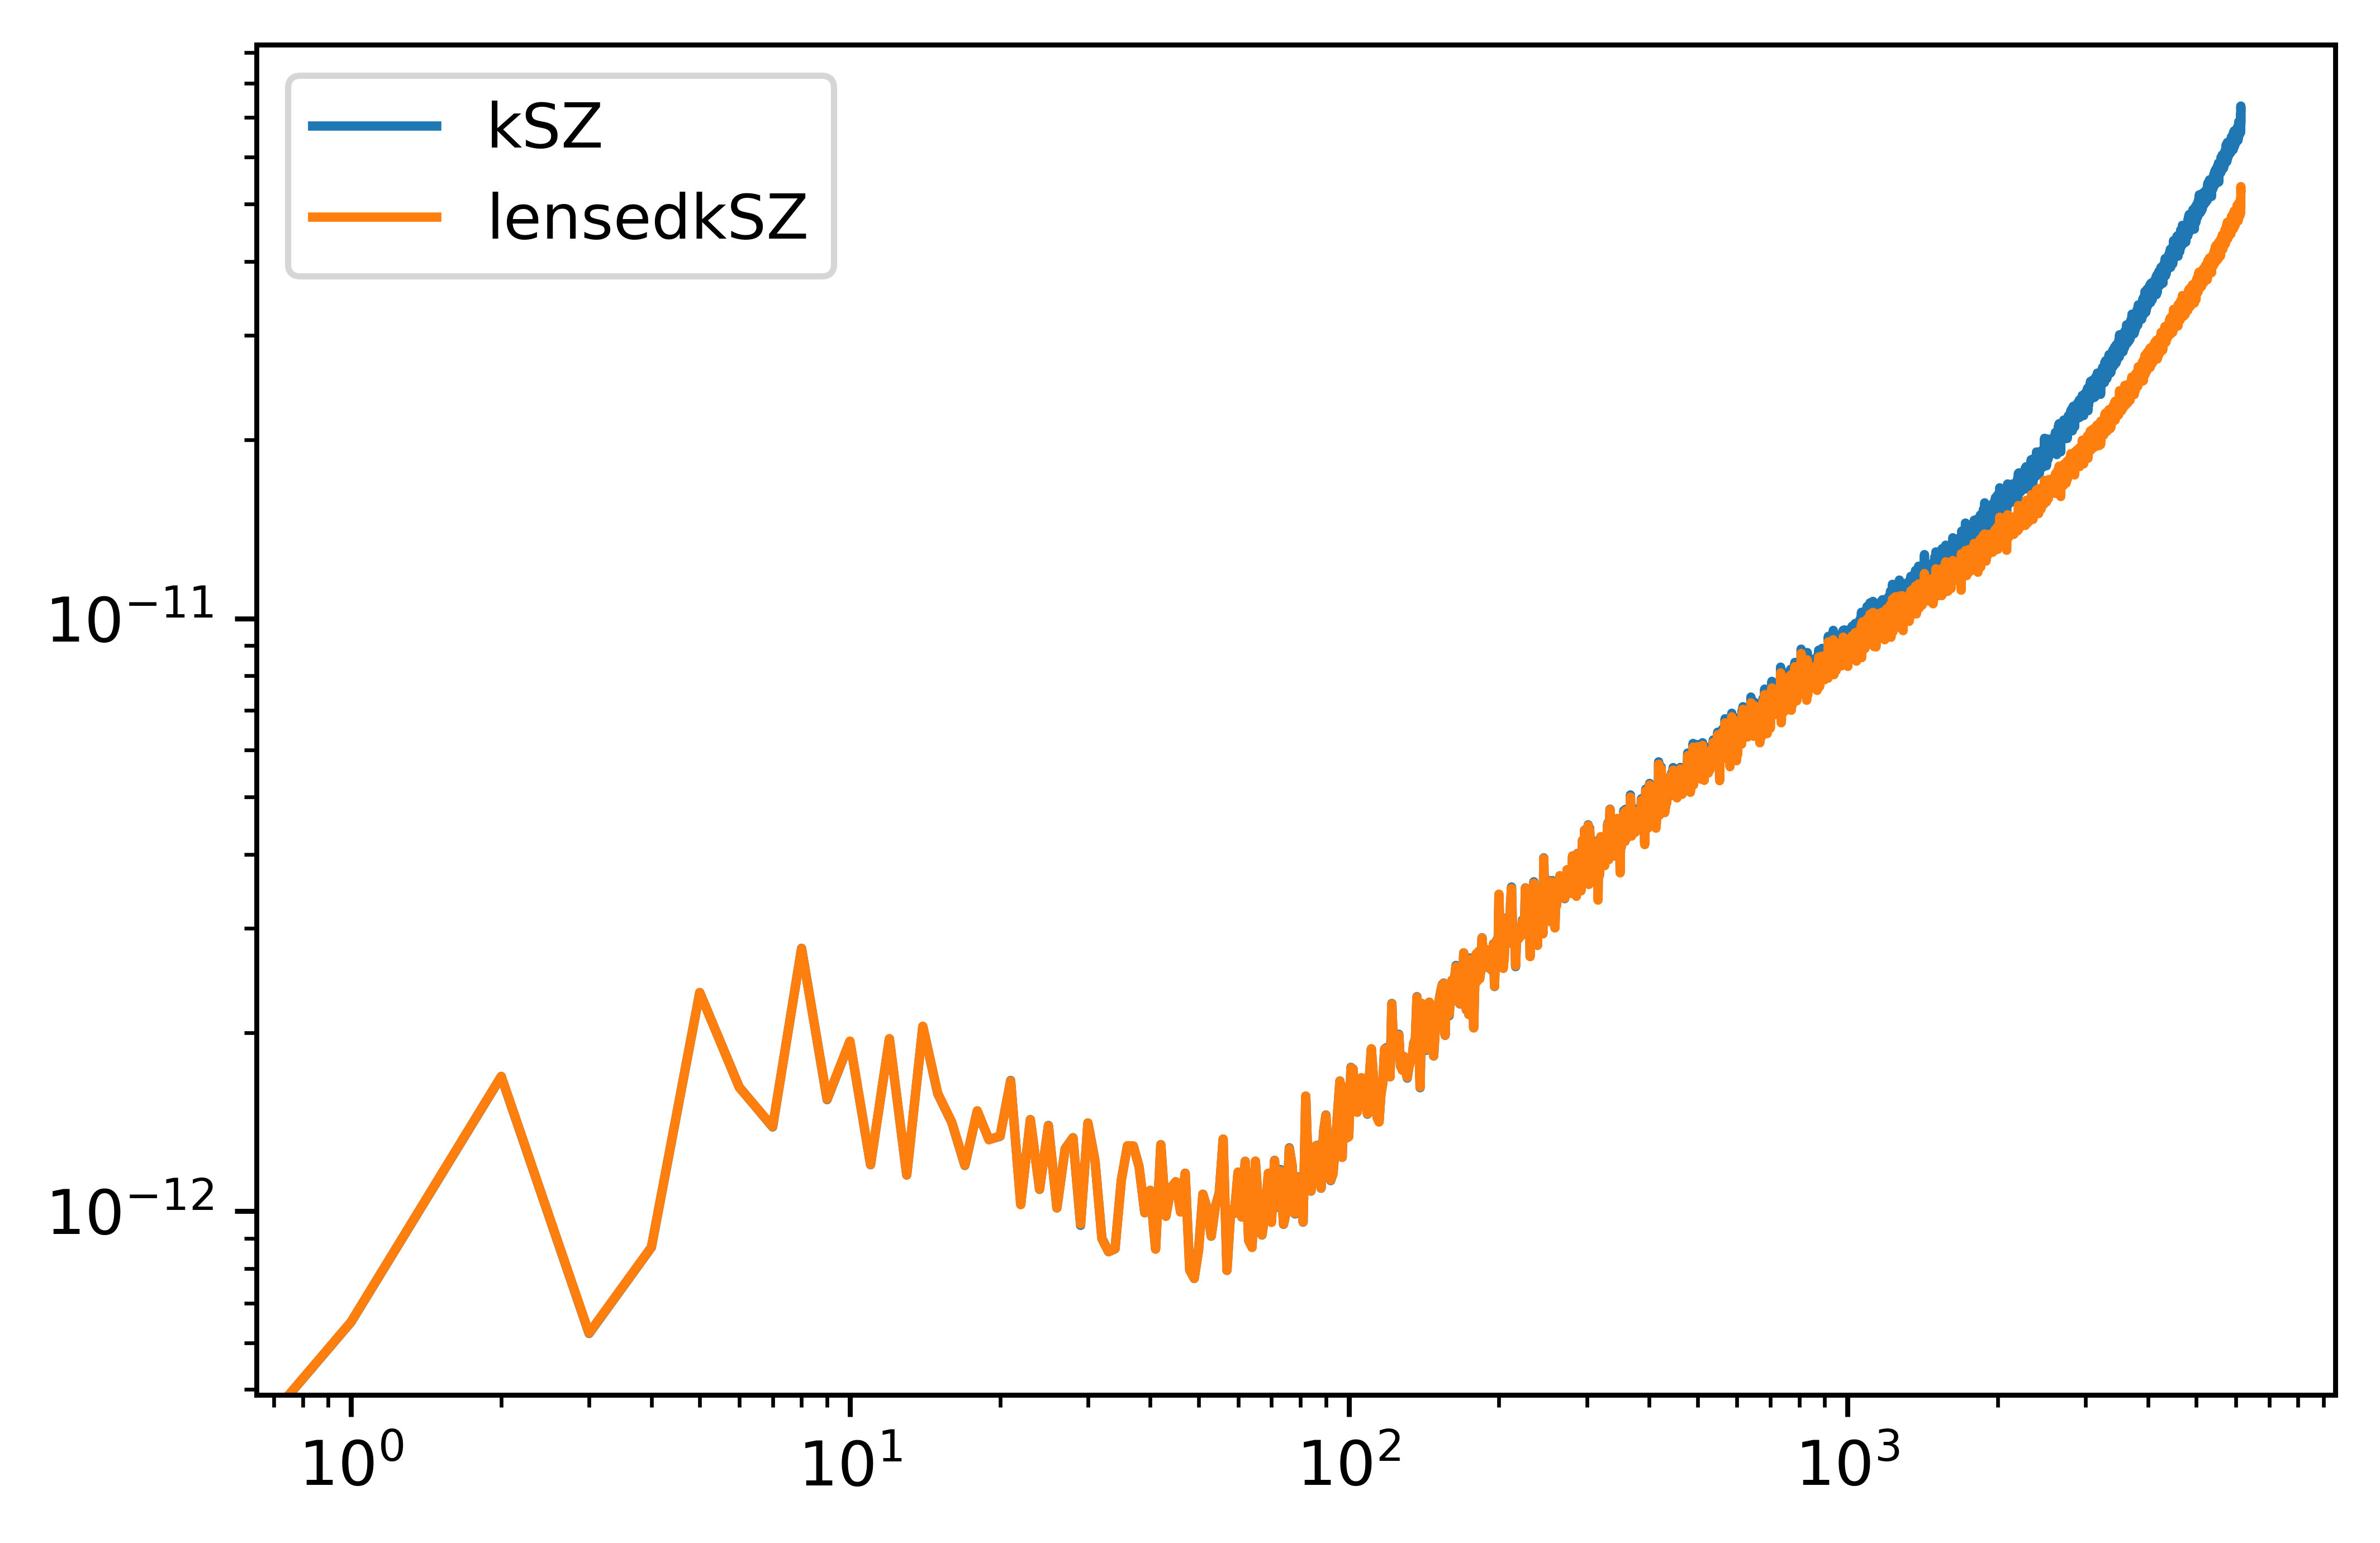

In [11]:
plt.figure(dpi=800)
plt.loglog(pskSZ*ls1*(ls1+1))
plt.loglog(pslensedkSZ*ls1*(ls1+1))
plt.legend(['kSZ','lensedkSZ'])

In [12]:
def Correlation(map1, map2):
    return hp.anafast(map1,map2)/(np.sqrt(hp.anafast(map1)*hp.anafast(map2))+np.finfo(np.float32).eps)

In [13]:
corr = Correlation(kSZ,lensedkSZ)

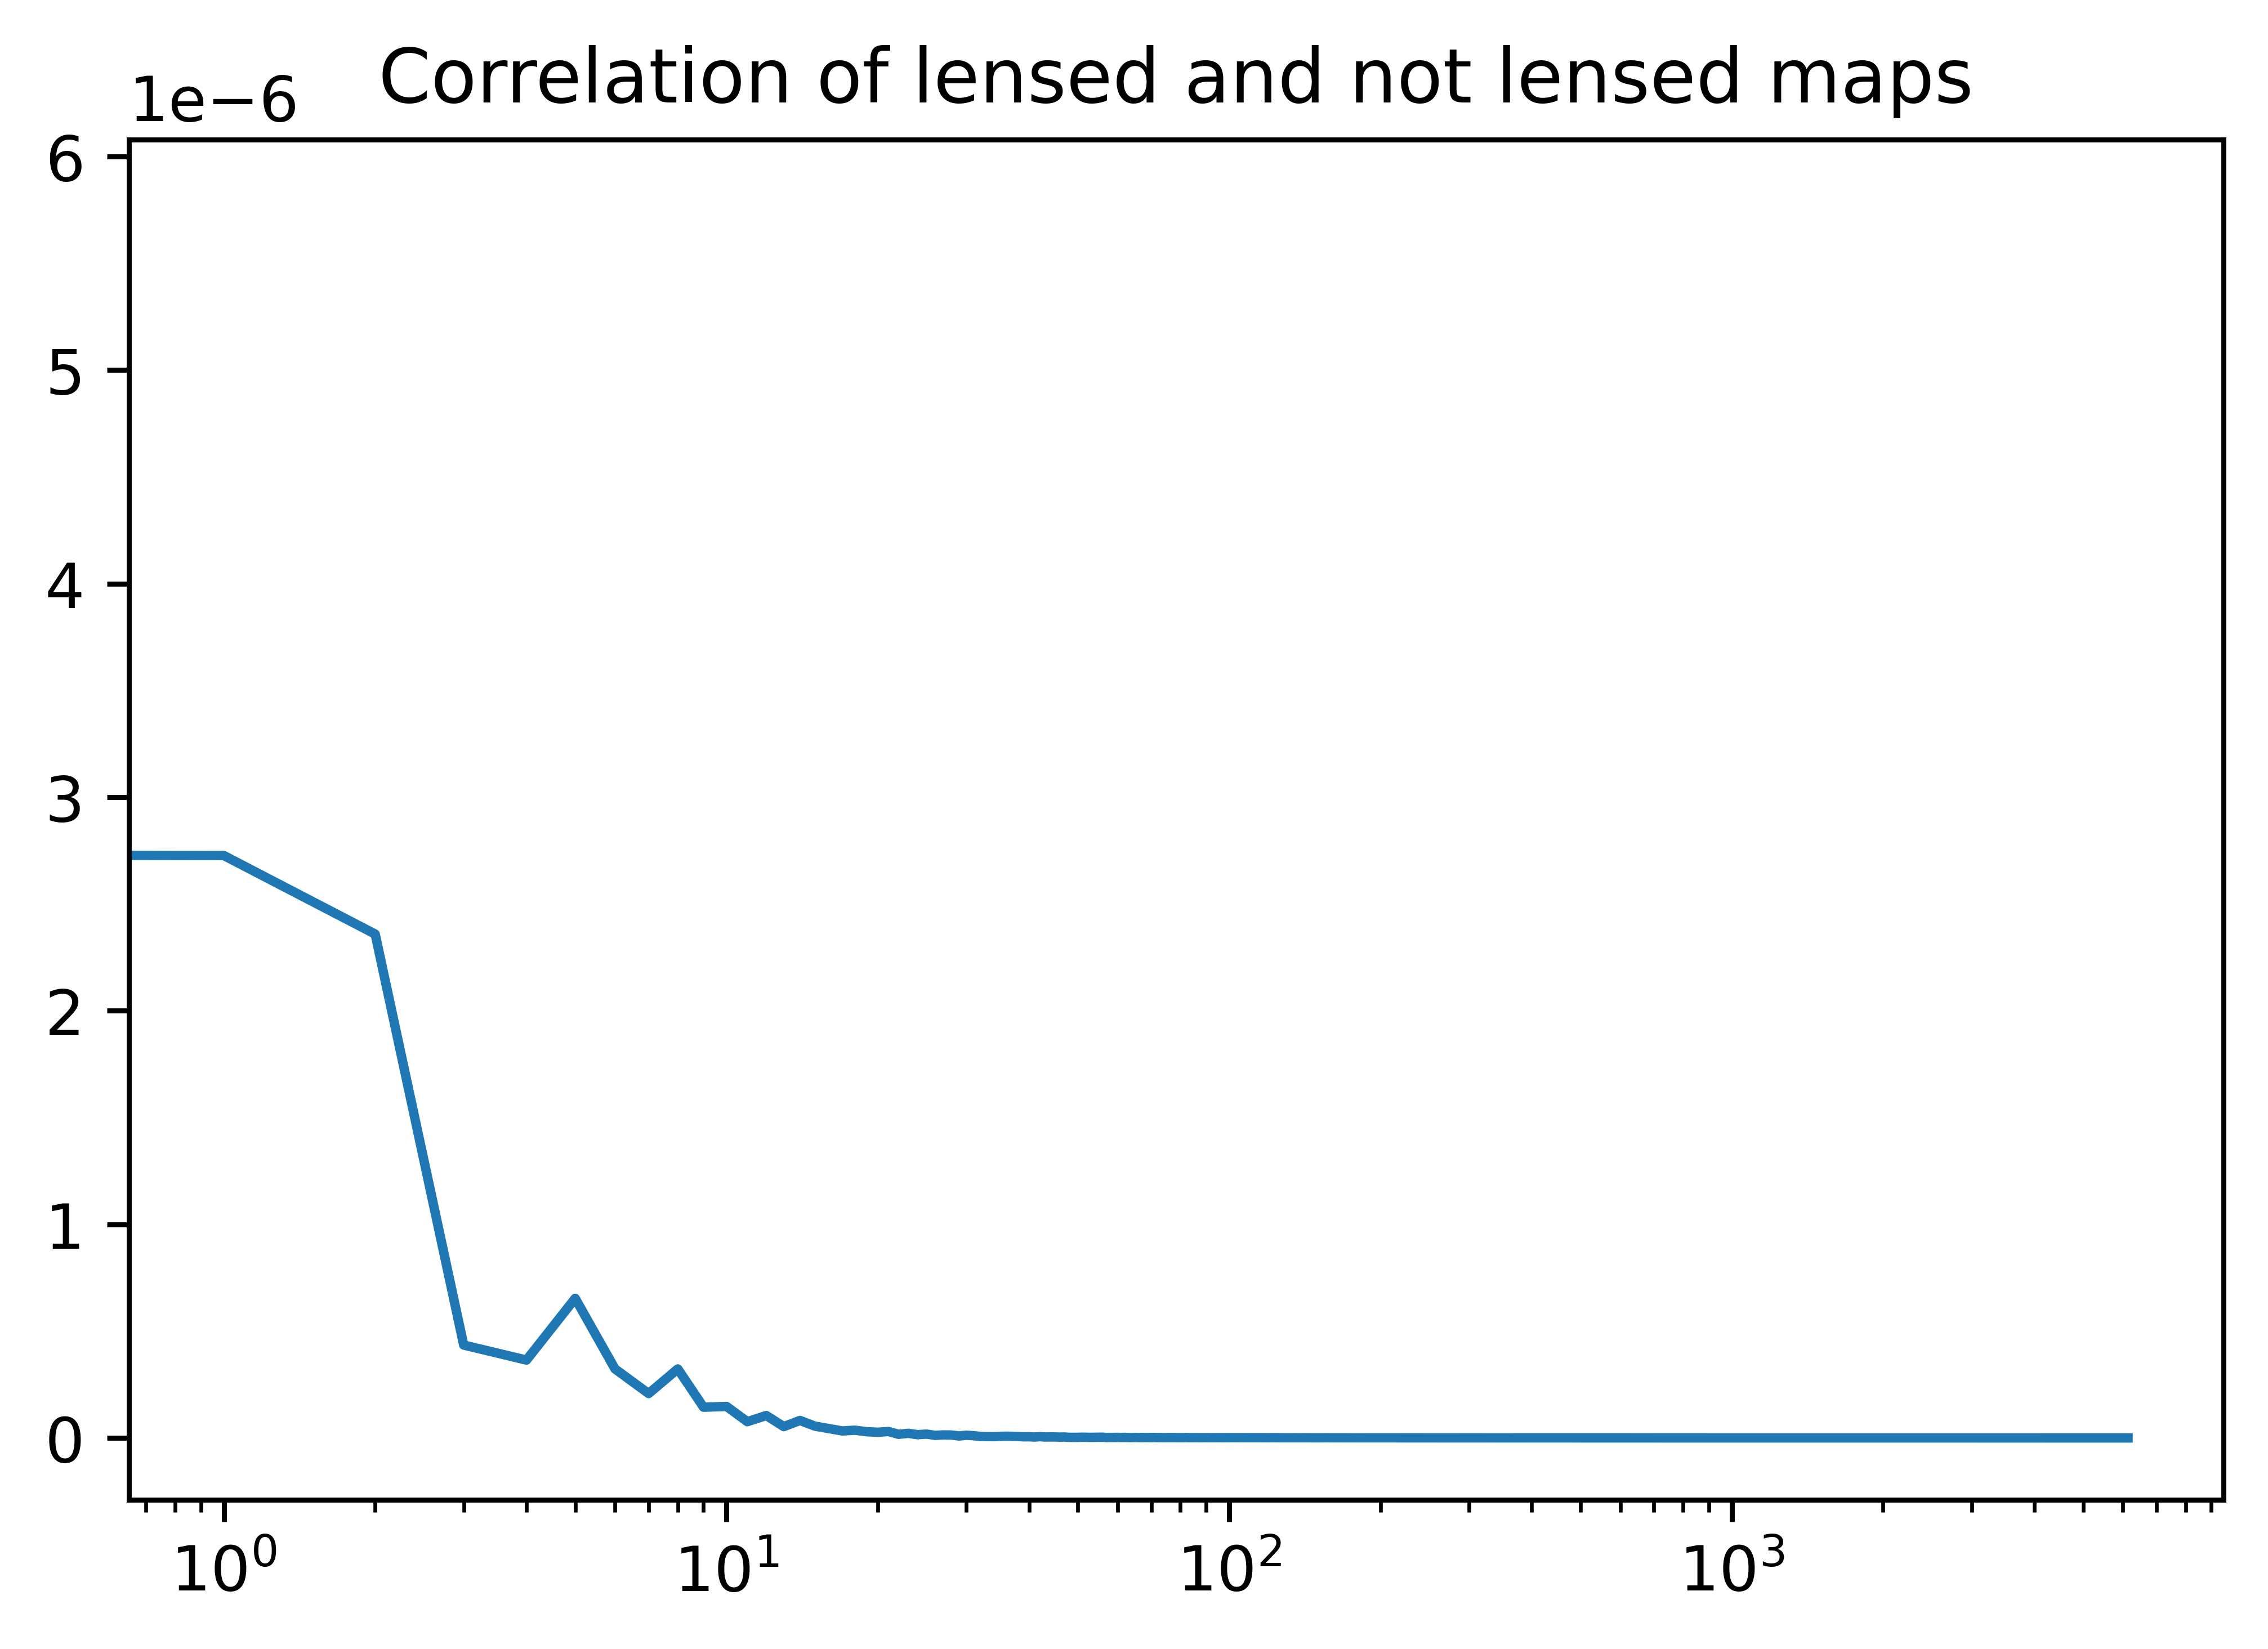

In [14]:
plt.figure(dpi=800)
plt.semilogx(corr)
plt.title("Correlation of lensed and not lensed maps");

In [15]:
nside = 2048
npix = 12*2048**2
baseAngle = hp.pixelfunc.pix2ang(nside, np.arange(0,npix))

In [16]:
deflectedTheta = baseAngle[0]
deflectedPhi = baseAngle[1]+0.001

In [17]:
undeflectedPhi = baseAngle[1]-0.001

In [18]:
rotatedkSZ = hp.pixelfunc.get_interp_val(kSZ,deflectedTheta,deflectedPhi)

In [19]:
psrkSZ = hp.anafast(rotatedkSZ)

In [20]:
unrotatedkSZ = hp.pixelfunc.get_interp_val(kSZ,deflectedTheta,undeflectedPhi)

In [21]:
psunrkSZ = hp.anafast(unrotatedkSZ)

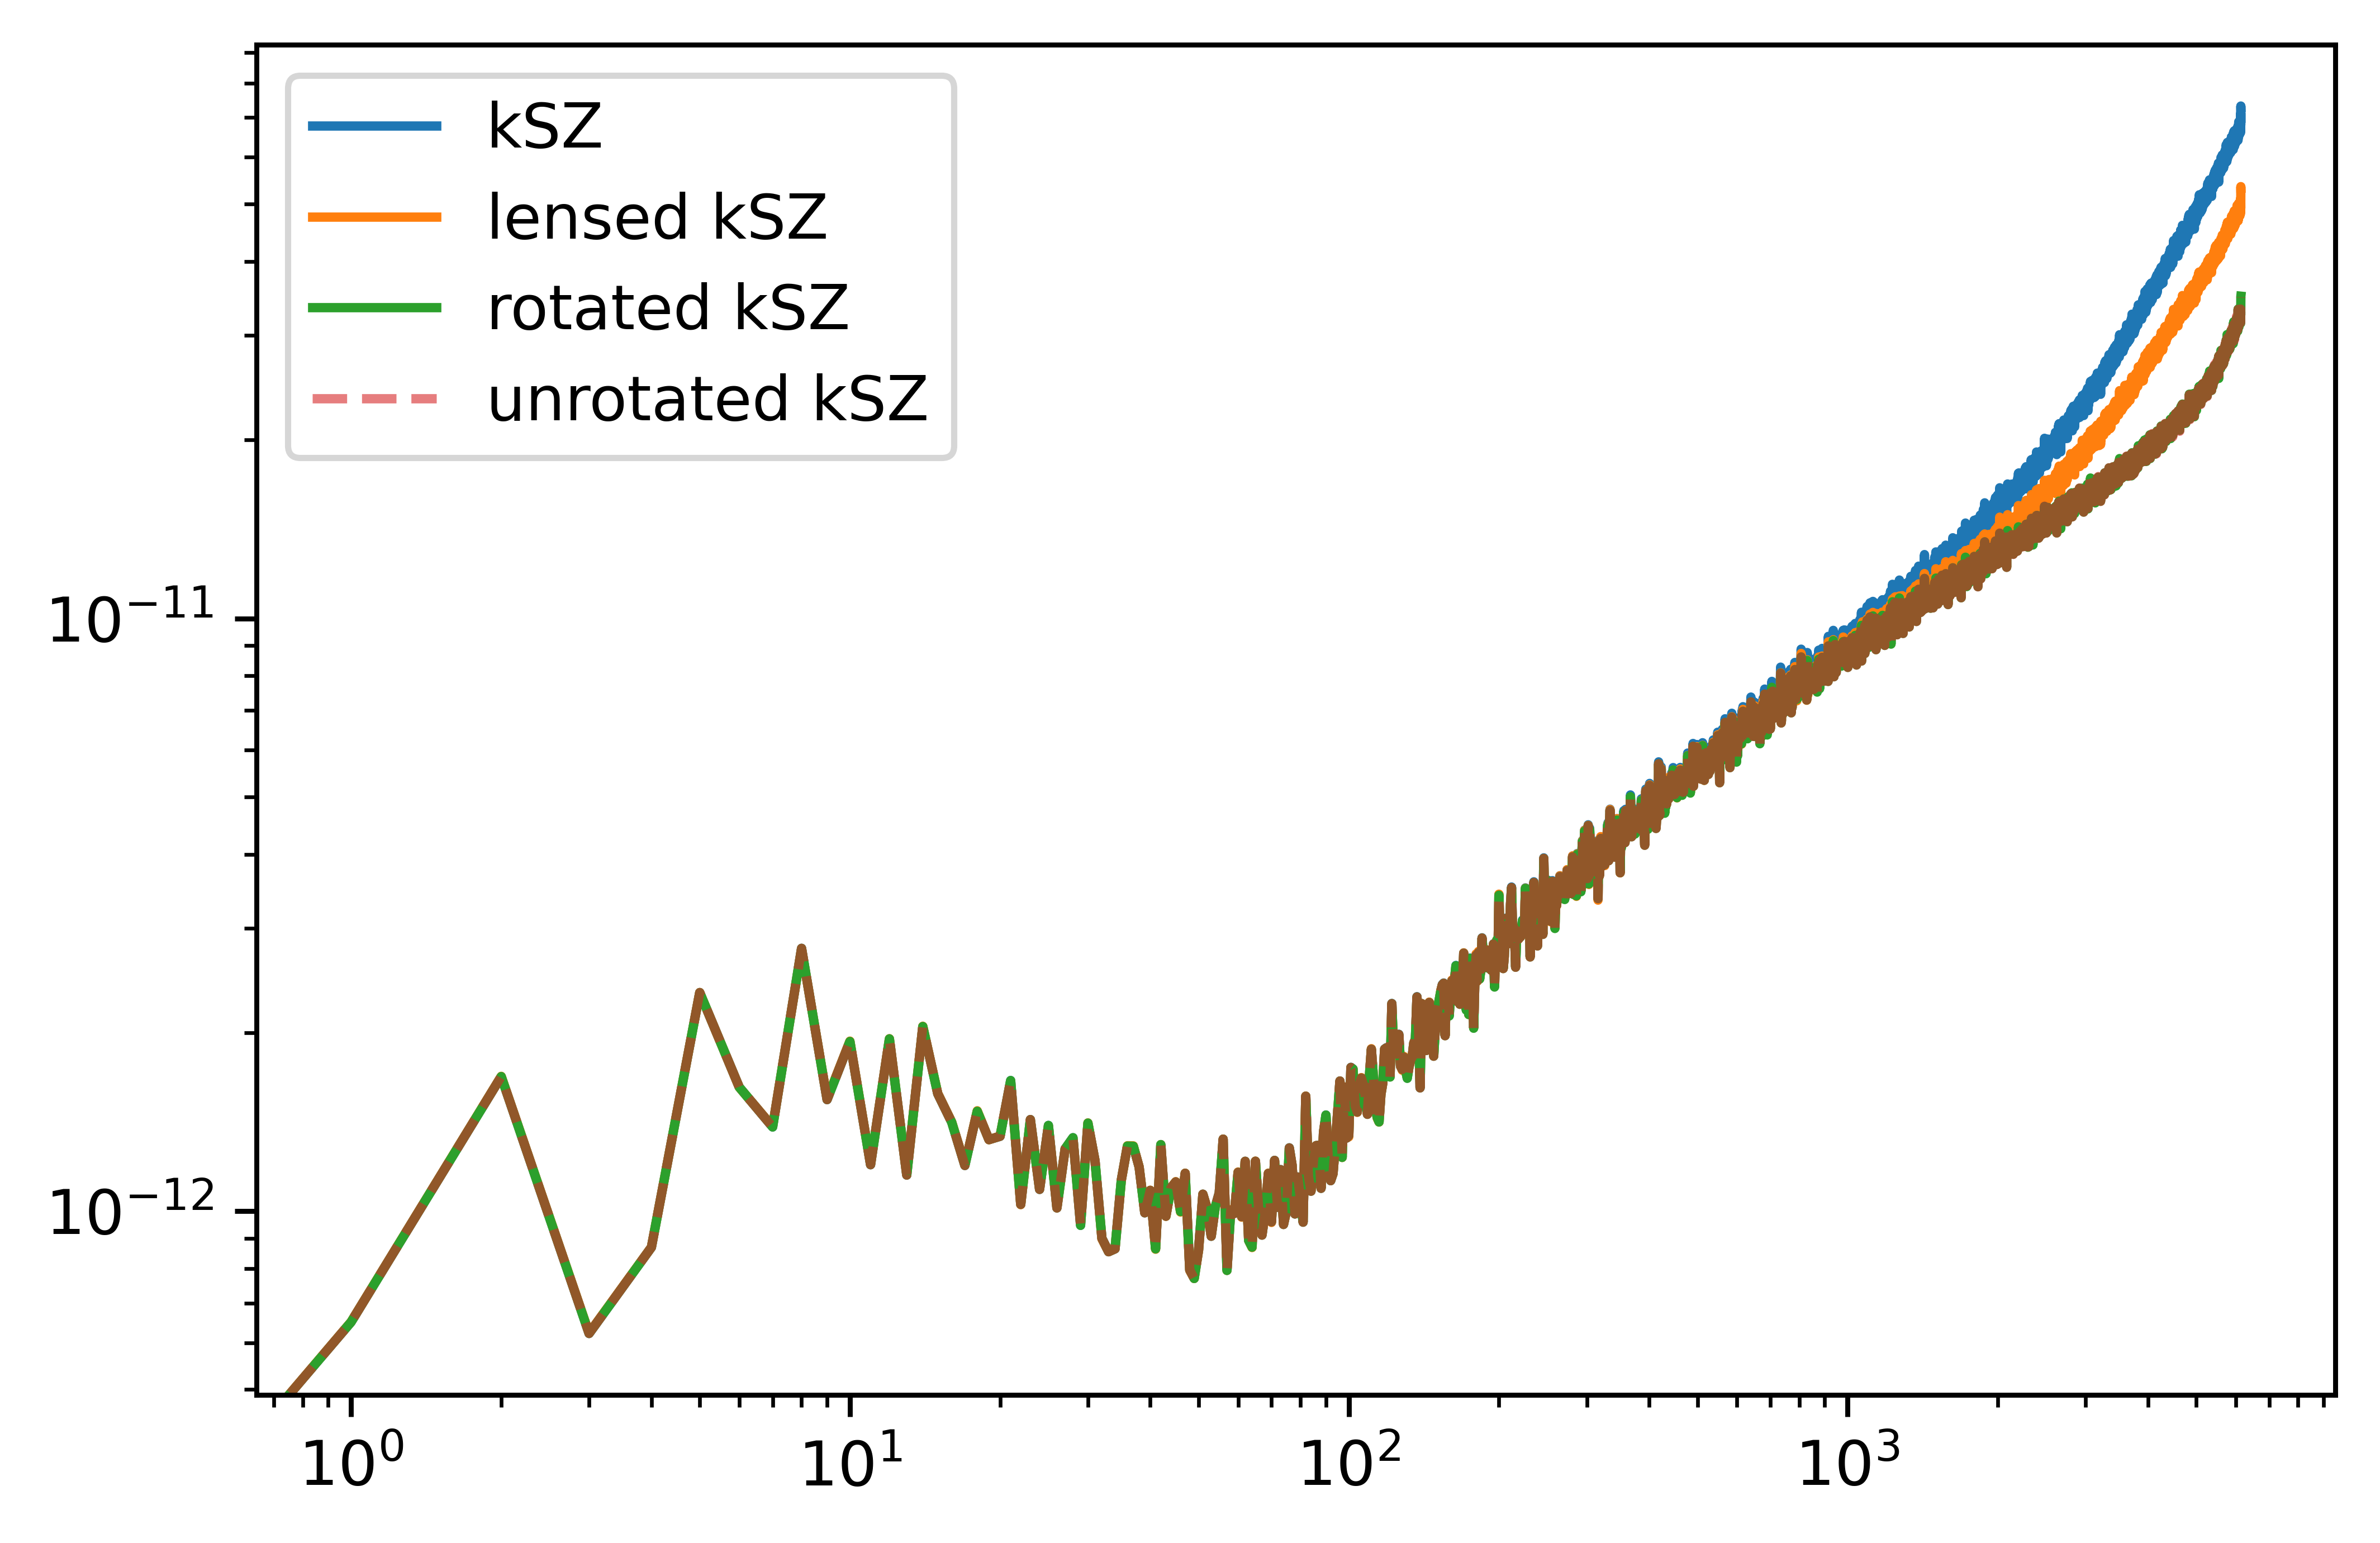

In [30]:
plt.figure(dpi=800)
plt.loglog(pskSZ*ls1*(ls1+1))
plt.loglog(pslensedkSZ*ls1*(ls1+1))
plt.loglog(psrkSZ*ls1*(ls1+1))
plt.loglog(psunrkSZ*ls1*(ls1+1),'--',alpha=0.6)
plt.legend(['kSZ','lensed kSZ','rotated kSZ','unrotated kSZ'])